<a href="https://colab.research.google.com/github/25051980/Machine_learning_final_draft_Samuel/blob/main/MVP_II_Machine_Learning_final_draft_Samuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introdução e descrição do problema.



A rentabilidade de um negócio depende muito de manter o cliente usando os serviços da empresa. Algo que pode ser difícil de obter no setor de telecomunicações. Devido a um mercado cada vez mais competitivo e à capacidade dos clientes de mudar para um novo provedor em poucos minutos, a rotatividade dos clientes tornou-se o problema mais prevalecente dentro da indústria de telecomunicações. A taxa de evasão da base de clientes que cancelam um serviço em um determinado período é conhecido como Churn.
Churn é um problema para as empresas de telecomunicações porque reduz a receita e aumenta os custos de aquisição e retenção de clientes. Isto pode acontecer em qualquer negócio, mas é mais comumente visto e associado à indústria de telecomunicações, em grande parte porque é um setor baseado em assinaturas.
Churn pode ser influenciado por vários fatores, como o tipo de contrato, a forma de pagamento, o serviço de internet, o suporte técnico, a satisfação do cliente, entre outros. Este Churn pode ser previsto usando técnicas de machine learning que analisam os dados dos clientes e identificam padrões de comportamento e risco de cancelamento. Com isto Churn pode ser reduzido com estratégias de fidelização, personalização, segmentação e comunicação com os clientes.

Para prevêr a probabilidade de um cliente fazer Churn será construido um modelo MVP Supervisionado de classificação: O MVP é construído a partir dos dados, que são apresentados na forma de pares ordenados (entrada — saída desejada). Os dados são rotulados, pois sabemos de antemão a saída esperada para cada entrada de dados. Temos como hipotese que o churn pode ter uma relação direta com o valor pago pelos clientes, comportamento de consumo, antiguidade/fidelidade com a empresa e a qualidade dos serviços.

In [ ]:
# importando bibliotecas
from pandas.core.api import DataFrame
# 1) Importando dados de uma url para um dataframe

# imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats # estatística
from sklearn.preprocessing import StandardScaler, OneHotEncoder # modelagem estatística. Padronização
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import os
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.preprocessing import LabelEncoder


In [ ]:
# url a importar
url_dados = 'https://raw.githubusercontent.com/25051980/MVP1/main/Churn.csv'


# carga do dataset através do csv
df = pd.read_csv(url_dados)#


# exibe as 5 primeiras linhas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Descrição do dataset

 Definição dos atributos

**CustomerID**: Identificação do cliente

**Gender: **bold text**Qual o gênero do cliente

**SeniorCitizen**: Informa se o cliente é idoso

**Partner:** Informa se o cliente tem parceiro

**Dependents:** Informa se o clientes tem dependentes

**Tenure:** Informa há quanto tempo os clientes estão na empresa (em meses)

**PhoneService:** Informa se o cliente tem serviço telefonico

**MultipleLines:** Informa se o cliente tem várias linhas

**InternetService:** Informa se o cliente tem serviço de internet

**OnlineSecurity**: Informa se o cliente tem segurança online

**OnlineBackup:** Informa se o cliente tem serviço de backup online

**DeviceProtection:** Informa se o cliente tem seguro de proteção do aparelho

**TechSupport:** Informa se o cliente tem suporte técnico

**StreamingTV:** **bold text** Informa se o cliente tem tvstreming

**StreamingMovies:** Informa se o cliente tem StreamMovies

**Contract:** Informa o tipo de contrato de cliente

**PaperlessBilling:** Informa se o cliente recebe boleto digital

**PaymentMethod:** Informa o método de pagamento do cliente

**MonthlyCharges:** Valor que o cliente paga mensalmente

**TotalCharges:** Valor total de cobranças de cada cliente desde que foi para a empresa.

**Churn:** Informa se o cliente fez Churn

In [ ]:
df.dtypes # Estamos observando os tipos de atributo.

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

A coluna TotalCharges está sendo identificada como object quando deveria de ser double.

In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce") # convertendo total charges para numerico, pois estava em object.
df[["TotalCharges", "MonthlyCharges"]].describe() # Vizualizando as estatísticas de TotalCharges e MonthlyCharges.



,TotalCharges,MonthlyCharges
count,7032.000000,7043.000000
mean,2283.300441,64.761692
std,2266.771362,30.090047
min,18.800000,18.250000
25%,401.450000,35.500000
50%,1397.475000,70.350000
75%,3794.737500,89.850000
max,8684.800000,118.750000


In [ ]:
Churn_count=df["Churn"].value_counts() # Contabilizando o número de churn no dataframe.
Churn_percentages = Churn_count / len(df) * 100
churn_summary = pd.DataFrame({'count': Churn_count, 'percentage': Churn_percentages})
print(churn_summary)

     count  percentage
No    5174   73.463013
Yes   1869   26.536987


In [ ]:
null_counts = df.isnull().sum() # Determinando a quantidade de valores nulls por coluna.
print(null_counts)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
df1 = df[df['TotalCharges'].notnull()] # Eliminando da base as linhas com TotalCharge igual a null.
df1.shape

(7032, 21)

In [ ]:
cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'] # Colunas para considerar
z_scores = np.abs(stats.zscore(df1[cols])) # Padronizando df1.

threshold = 3 # Tomando 3 desvios padrões como limiar para considerar um valor como outlier.
outliers = df1[(z_scores > threshold).any(axis=1)]
print(outliers)

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []


In [ ]:
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### Análise descritiva dos dados

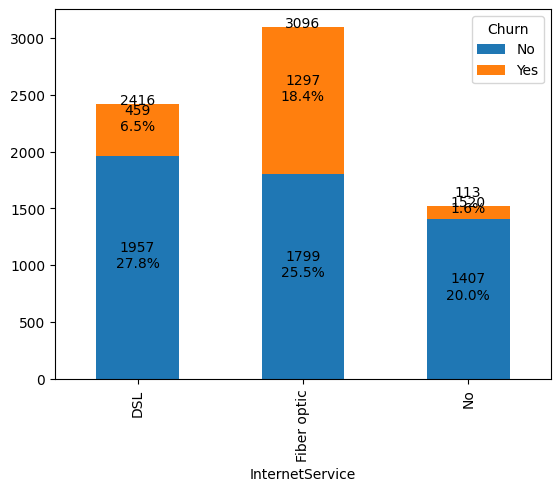

In [ ]:
#  Agrupando os clientes pelas colunas 'InternetService' e 'churn'
grouped_Is = df1.groupby(['InternetService', 'Churn']).size().unstack()

ax = grouped_Is.plot(kind='bar', stacked=True)

# Adicionando os números e porcentagens nas barras
totals = [0] * len(grouped_Is)
for i, p in enumerate(ax.patches):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2, y+height/2, '{:.0f}\n{:.1%}'.format(height, height/df.shape[0]), ha='center')
    totals[i % len(grouped_Is)] += height

# Adicionando o valor total em cada coluna
for i, total in enumerate(totals):
    ax.text(i, total, '{:.0f}'.format(total), ha='center')
plt.show()

O maior volume e taxa de Churn estão concentrados nos clientes que tem serviço de internet por fibra ótica.

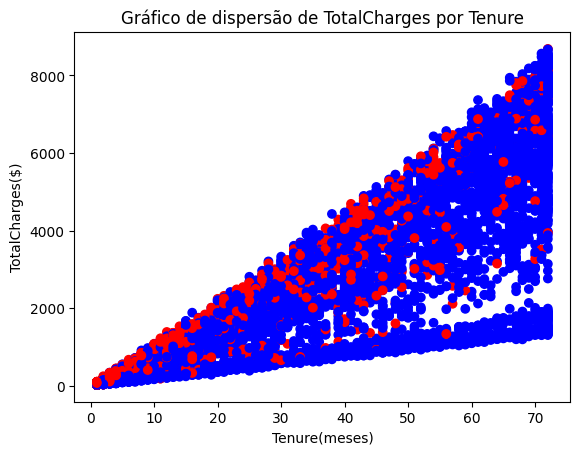

In [ ]:
# Criando um scatter plot com as colunas 'TotalCharges', 'Churn' e 'tenure'
colors = {'Yes': 'red', 'No': 'blue'}
plt.scatter(df1['tenure'], df1['TotalCharges'], c=df1['Churn'].map(colors))

# Adicionando título e rótulos aos eixos
plt.title('Gráfico de dispersão de TotalCharges por Tenure')
plt.xlabel('Tenure(meses)')
plt.ylabel('TotalCharges($)')
plt.show()

Foi observado que para valores fixos de Tenure, a maior taxa de Churn se concentra em valores maiores de TotalCharges.Por isso foi possivel observar maior concentração de pontos na diagonal de cima do gráfico.

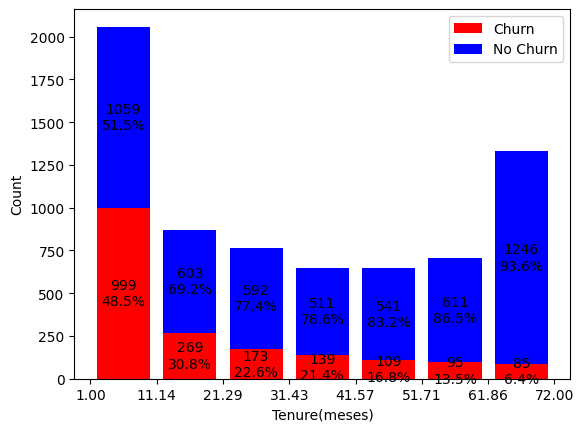

In [ ]:
# Calculate the histogram values for Churn and No Churn
churn_counts, bin_edges = np.histogram(df1.loc[df1['Churn'] == 'Yes', 'tenure'], bins=7)
no_churn_counts, _ = np.histogram(df1.loc[df1['Churn'] == 'No', 'tenure'], bins=bin_edges)

# Plot the stacked histogram
plt.hist([df1.loc[df1['Churn'] == 'Yes', 'tenure'], df1.loc[df1['Churn'] == 'No', 'tenure']], stacked=True, color=['red', 'blue'], label=['Churn', 'No Churn'], bins=bin_edges, rwidth=0.8)
plt.xticks(bin_edges)
plt.legend()

# Add text annotations
for i in range(len(churn_counts)):
    x = (bin_edges[i] + bin_edges[i+1]) / 2
    y1 = churn_counts[i]
    y2 = no_churn_counts[i]
    total = y1 + y2
    percentage1 = y1 / total * 100
    percentage2 = y2 / total * 100
    plt.text(x, y1/2, f'{y1}\n{percentage1:.1f}%', ha='center', va='center')
    plt.text(x, y1+y2/2, f'{y2}\n{percentage2:.1f}%', ha='center', va='center')

plt.xlabel('Tenure(meses)')
plt.ylabel('Count')
plt.show()

Foi observado que para valores menores de tenure (clientes novos) existe um maior volume de Churn.

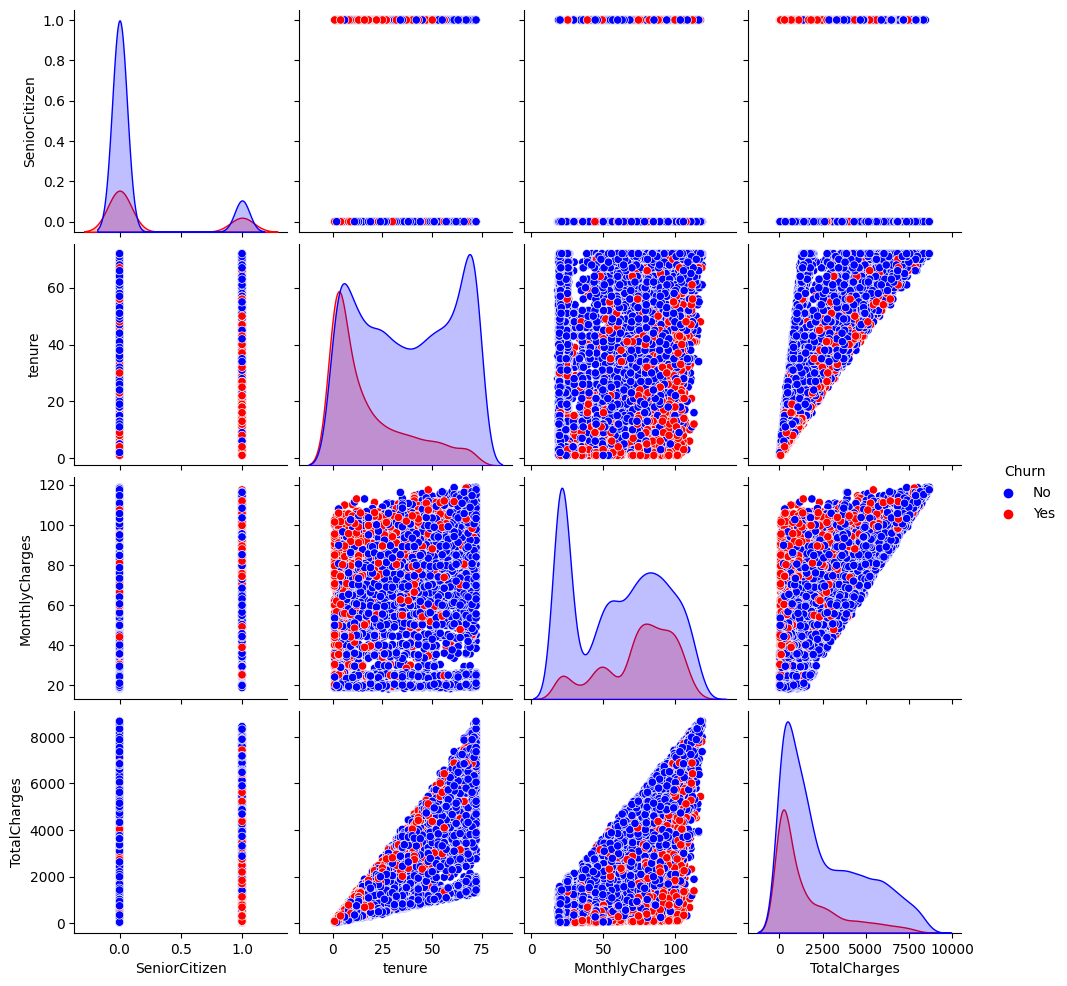

In [ ]:
# Selecionando só as colunas numéricas do DataFrame
numeric_columns = df1.select_dtypes(include=np.number).columns

# Creando um pairplot com hue sendo a coluna de churn
sns.pairplot(df1, hue='Churn', vars=numeric_columns, palette={'Yes': 'red', 'No': 'blue'})

plt.show()

#### Fazendo seleção de features

Foi feito o processo de feature selection manualmente, para cada combinação de features considerámos as métricas do modelo (KS e AUC), para escolher a melhor combinação.

In [ ]:
# numeric_features = ['MonthlyCharges'] # Especificando colunas numéricas
# categorical_features = ['MultipleLines','TechSupport', 'PaymentMethod']

In [ ]:
# Melhor combinação de features

numeric_features = ['SeniorCitizen','tenure', 'MonthlyCharges','TotalCharges'] # Especificando colunas numericas
categorical_features = ['gender','MultipleLines', 'InternetService','OnlineSecurity','DeviceProtection','OnlineBackup','TechSupport','StreamingTV','StreamingMovies','Contract', 'PaymentMethod']

Foram testadas várias combinações de features e foram deixadas as que resultaram um melhor KS e AUC

### Construção dos pipelines


In [ ]:
# Criar os transformers para aplicar o StandardScaler e OneHotEncoder
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())]) # Pipeline - padronizar colunas numericas
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]) # Pipeline - criando colunas dummies (0,1) para colunas categoricas

# Usar o ColumnTransformer para aplicar os transformers nas colunas corretas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features), # Aplicando o pipeline numeric_transformer as colunas numéricas
        ('cat', categorical_transformer, categorical_features)]) # Aplicando o pipeline categorical_transformer as colunas categóricas

# Criar os modelos que serão usados na k-fold cross-validation
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()

In [ ]:
# Fazer a k-fold cross-validation usando os modelos criados acima
kfold = KFold(n_splits=10)
df1 = df1.reset_index(drop=True)
df1['Churn']=df1['Churn'].map({'Yes': 1, 'No': 0})

colunas_selecionadas = numeric_features + categorical_features
df_selecionados = df1[colunas_selecionadas]

# Cria listas vazias para armazenar os resultados dos modelos
lr_scores = []
rf_scores = []
lr_reports = []
rf_reports = []

for train_index, test_index in kfold.split(df1):
    X_train=df_selecionados.iloc[train_index]
    X_test=df_selecionados.iloc[test_index]
    y_train=df1['Churn'][train_index]
    y_test=df1['Churn'][test_index]

# Aplicando os pipelines definidos anteriormente
    clf_lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', logistic_regression)])
    clf_rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', random_forest)])

    clf_lr.fit(X_train, y_train) # Treinando os modelos de regressão logistica
    clf_rf.fit(X_train, y_train) # Treinando os modelos de random forest

    # Faz as predicoes com os dados de teste
    y_pred_lr = clf_lr.predict(X_test)
    y_pred_rf = clf_rf.predict(X_test)

# Calcula os scores de acuracia para cada modelo
    lr_score = clf_lr.score(X_test, y_test)
    rf_score = clf_rf.score(X_test, y_test)

    # Adiciona os scores nas listas correspondentes
    lr_scores.append(lr_score)
    rf_scores.append(rf_score)

    # Calcula os relatorios de classificacao para cada modelo
    lr_report = classification_report(y_test, y_pred_lr, output_dict=True)
    rf_report = classification_report(y_test, y_pred_rf, output_dict=True)

    # Adiciona os relatorios nas listas correspondentes
    lr_reports.append(lr_report)
    rf_reports.append(rf_report)

    print("Logistic Regression score: %.3f" % clf_lr.score(X_test, y_test))
    print("Random Forest score: %.3f" % clf_rf.score(X_test, y_test))

Logistic Regression score: 0.801
Random Forest score: 0.780
Logistic Regression score: 0.803
Random Forest score: 0.814
Logistic Regression score: 0.807
Random Forest score: 0.797
Logistic Regression score: 0.822
Random Forest score: 0.798
Logistic Regression score: 0.789
Random Forest score: 0.765
Logistic Regression score: 0.785
Random Forest score: 0.752
Logistic Regression score: 0.817
Random Forest score: 0.794
Logistic Regression score: 0.792
Random Forest score: 0.757
Logistic Regression score: 0.805
Random Forest score: 0.795
Logistic Regression score: 0.801
Random Forest score: 0.782


In [ ]:
label_encoder = LabelEncoder()
y_train=label_encoder.fit_transform(y_train)
y_test=label_encoder.transform(y_test)

In [ ]:
# Calcula a media dos scores de acuracia para cada modelo
lr_mean_score = np.mean(lr_scores)
rf_mean_score = np.mean(rf_scores)

# Imprime a media dos scores de acuracia para cada modelo
print(f"Logistic Regression mean score: {lr_mean_score:.3f}")
print(f"Random Forest mean score: {rf_mean_score:.3f}")


# Cria um dataframe vazio para armazenar a tabela de metricas
metrics_df = pd.DataFrame()

# Loop sobre as metricas de interesse
for metric in ['precision', 'recall', 'f1-score']:
    # Calcula a media das metricas para cada modelo e cada classe
    lr_mean_metric_0 = np.mean([report['0'][metric] for report in lr_reports])
    lr_mean_metric_1 = np.mean([report['1'][metric] for report in lr_reports])
    rf_mean_metric_0 = np.mean([report['0'][metric] for report in rf_reports])
    rf_mean_metric_1 = np.mean([report['1'][metric] for report in rf_reports])


Logistic Regression mean score: 0.802
Random Forest mean score: 0.783


In [ ]:
# Calcula a media dos scores de acuracia para cada modelo
lr_mean_score = np.mean(lr_scores)
rf_mean_score = np.mean(rf_scores)

# Imprime a media dos scores de acuracia para cada modelo
print(f"Logistic Regression mean score: {lr_mean_score:.3f}")
print(f"Random Forest mean score: {rf_mean_score:.3f}")

# Cria um dataframe vazio para armazenar a tabela de metricas
metrics_df = pd.DataFrame()

# Loop sobre as metricas de interesse
for metric in ['precision', 'recall', 'f1-score']:
    # Calcula a media das metricas para cada modelo e cada classe
    lr_mean_metric_0 = np.mean([report['0'][metric] for report in lr_reports])
    lr_mean_metric_1 = np.mean([report['1'][metric] for report in lr_reports])
    rf_mean_metric_0 = np.mean([report['0'][metric] for report in rf_reports])
    rf_mean_metric_1 = np.mean([report['1'][metric] for report in rf_reports])

    # Adiciona as medias das metricas no dataframe
    metrics_df.loc['Logistic Regression', f'{metric} (class 0)'] = lr_mean_metric_0
    metrics_df.loc['Logistic Regression', f'{metric} (class 1)'] = lr_mean_metric_1
    metrics_df.loc['Random Forest', f'{metric} (class 0)'] = rf_mean_metric_0
    metrics_df.loc['Random Forest', f'{metric} (class 1)'] = rf_mean_metric_1

# Adiciona a media dos scores de acuracia no dataframe
metrics_df['accuracy'] = [lr_mean_score, rf_mean_score]

# Mostra o dataframe com as metricas
print(metrics_df)

Logistic Regression mean score: 0.802
Random Forest mean score: 0.783
                     precision (class 0)  precision (class 1)  \
Logistic Regression             0.845621             0.652275   
Random Forest                   0.829447             0.616898   

                     recall (class 0)  recall (class 1)  f1-score (class 0)  \
Logistic Regression          0.893963          0.549770            0.869012   
Random Forest                0.887574          0.496267            0.857396   

                     f1-score (class 1)  accuracy  
Logistic Regression            0.596002  0.802190  
Random Forest                  0.549235  0.783415  


#### Processo de otimização de hiperparametros

In [ ]:
# Define os parametros que quer testar para o random forest
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5],
    'classifier__max_features': ['auto', 'sqrt']
}

# Cria o objeto GridSearchCV para o random forest
grid_search = GridSearchCV(clf_rf, param_grid=param_grid)

# Treina o modelo com os parametros otimizados usando toda a base de dados
grid_search.fit(df_selecionados, df1['Churn'])

# Mostra os melhores parametros encontrados
print(grid_search.best_params_)

{'classifier__max_depth': 5, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 100}


Random Forest optimized score: 0.785
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1549
           1       0.65      0.42      0.51       561

    accuracy                           0.79      2110
   macro avg       0.73      0.67      0.68      2110
weighted avg       0.77      0.79      0.77      2110



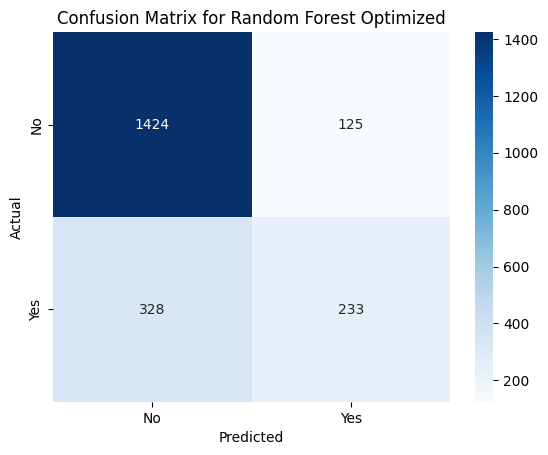

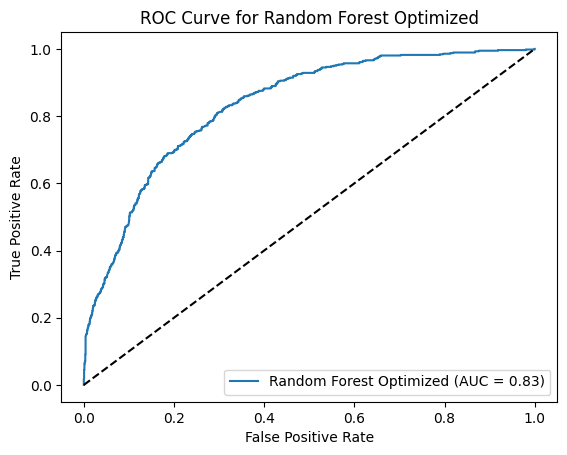

KS for Random Forest Optimized: 0.514


In [ ]:
# Separa os dados em treino e teste usando a mesma divisao anterior
X_train, X_test, y_train, y_test = train_test_split (df_selecionados, df1['Churn'], test_size = 0.3, random_state=42)

# Cria um novo pipeline para o random forest usando os melhores parametros encontrados
clf_rf_opt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=100, max_depth=5, max_features='auto'))])

# Treina o modelo com os dados de treino
clf_rf_opt.fit(X_train, y_train)

# Faz as predicoes com os dados de teste
y_pred_rf_opt = clf_rf_opt.predict(X_test)

# Calcula o score de acuracia do modelo
rf_opt_score = clf_rf_opt.score(X_test, y_test)

# Imprime o score de acuracia do modelo
print(f"Random Forest optimized score: {rf_opt_score:.3f}")

# Calcula o relatorio de classificacao do modelo
rf_opt_report = classification_report(y_test, y_pred_rf_opt)

# Imprime o relatorio de classificacao do modelo
print(rf_opt_report)

# Calcula a matriz de confusao do modelo
rf_opt_cm = confusion_matrix(y_test, y_pred_rf_opt)

# Cria um dataframe com a matriz de confusao e os labels
rf_opt_cm_df = pd.DataFrame(rf_opt_cm, index=['No', 'Yes'], columns=['No', 'Yes'])

# Plota a matriz de confusao usando seaborn
sns.heatmap(rf_opt_cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Optimized')
plt.show()

# Calcula as probabilidades das predicoes do modelo
y_pred_prob_rf_opt = clf_rf_opt.predict_proba(X_test)[:,1]

# Calcula a curva ROC e a area sob a curva (AUC) do modelo
fpr_rf_opt, tpr_rf_opt, thresholds_rf_opt = roc_curve(y_test, y_pred_prob_rf_opt)
auc_rf_opt = auc(fpr_rf_opt, tpr_rf_opt)

# Plota a curva ROC e a AUC do modelo
plt.plot(fpr_rf_opt, tpr_rf_opt, label=f'Random Forest Optimized (AUC = {auc_rf_opt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Optimized')
plt.legend()
plt.show()

# Calcula o KS do modelo
ks_rf_opt = max(tpr_rf_opt - fpr_rf_opt)

# Imprime o KS do modelo
print(f"KS for Random Forest Optimized: {ks_rf_opt:.3f}")

O melhor modelo encontrado foi o Random forest optimizado que atingiu um ks de = 0.516 e um AUC = 0.83

### Conclusões

Foi realizado um trabalho de modelagem de Churn para prever a probabilidade de um cliente cancelar o serviço em um determinado período. O modelo foi construído usando técnicas de machine learning e dados rotulados, e foram testados dois modelos supervisionados: um modelo logístico e um modelo random forest. O modelo random forest foi escolhido para otimização de hiper-parâmetros e apresentou resultados satisfatórios, com KS = 0.516, AUC = 0.83, precisão = 0.65 e recall = 0.42.

O valor KS de 0.516 indica que o modelo é capaz de distinguir bem entre os clientes que farão Churn e os que não farão. Quanto maior o valor de KS, melhor é a capacidade do modelo de separar as duas classes. Já o valor AUC de 0.83 indica que o modelo tem uma boa capacidade de classificação, pois quanto mais próximo de 1, melhor é o desempenho do modelo.

A precisão de 0.65 indica que o modelo é capaz de prever corretamente os clientes que farão Churn em 65% das vezes, enquanto o recall de 0.42 indica que o modelo identifica corretamente 42% dos clientes que realmente cancelam o serviço. Isso significa que o modelo tem uma capacidade razoável de prever a probabilidade de Churn, mas ainda há espaço para melhorias na identificação de todos os clientes que realmente cancelam o serviço. Esses resultados podem ser úteis para as empresas de telecomunicações, pois permitem que elas implementem estratégias de fidelização, personalização, segmentação e comunicação com os clientes para reduzir a taxa de Churn e aumentar a rentabilidade do negócio.